#### Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

#### MNIST 데이터 읽어오기

In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### 변수 선언 및 초기화
- xavier를 이용하여 변수 초기화

In [3]:
learning_rate = 0.001
num_epochs = 15
batch_size = 100
keep_prob = tf.placeholder(tf.float32)

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.get_variable("W1", shape=[784, 392], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([392]))
L1 = tf.nn.relu(tf.matmul(x, W1) + b1)

W2 = tf.get_variable("W2", shape=[392, 392], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([392]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[392, 392], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([392]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[392, 392], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([392]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[392, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))

y_ = tf.matmul(L4, W5) + b5

#### Dropout
- Dropout을 새로이 구성하여 비교

In [4]:
W1_DO = tf.get_variable("W1_DO", shape=[784, 392], initializer=tf.contrib.layers.xavier_initializer())
b1_DO = tf.Variable(tf.random_normal([392]))
h1_DO = tf.nn.relu(tf.matmul(x, W1_DO) + b1_DO)
L1_DO = tf.nn.dropout(h1_DO, keep_prob)

W2_DO = tf.get_variable("W2_DO", shape=[392, 392], initializer=tf.contrib.layers.xavier_initializer())
b2_DO = tf.Variable(tf.random_normal([392]))
h2_DO = tf.nn.relu(tf.matmul(L1_DO, W2_DO) + b2_DO)
L2_DO = tf.nn.dropout(h2_DO, keep_prob)

W3_DO = tf.get_variable("W3_DO", shape=[392, 392], initializer=tf.contrib.layers.xavier_initializer())
b3_DO = tf.Variable(tf.random_normal([392]))
h3_DO = tf.nn.relu(tf.matmul(L2_DO, W3_DO) + b3_DO)
L3_DO = tf.nn.dropout(h3_DO, keep_prob)

W4_DO = tf.get_variable("W4_DO", shape=[392, 392], initializer=tf.contrib.layers.xavier_initializer())
b4_DO = tf.Variable(tf.random_normal([392]))
h4_DO = tf.nn.relu(tf.matmul(L3_DO, W4_DO) + b4_DO)
L4_DO = tf.nn.dropout(h4_DO, keep_prob)

W5_DO = tf.get_variable("W5_DO", shape=[392, 10], initializer=tf.contrib.layers.xavier_initializer())
b5_DO = tf.Variable(tf.random_normal([10]))

y_DO = tf.matmul(L4_DO, W5_DO) + b5_DO

#### 정확도 평가 변수 선언

In [5]:
correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### dropout 정확도 평가 변수 선언

In [6]:
correct_prediction_DO = tf.equal(tf.argmax(y_DO, 1), tf.argmax(y_, 1))
accuracy_DO = tf.reduce_mean(tf.cast(correct_prediction_DO, tf.float32))

#### cost 함수와 optimizer 정의
- Gradient Descent Optimizer를 사용하였다.

In [7]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
cost_DO = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_DO))
optimizer_DO = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_DO)

#### Session 시작 및 변수 초기화

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#### 학습 시작

Epoch:  1 cost = 2.75032 - Dropout
Epoch:  2 cost = 2.44191 - Dropout
Epoch:  3 cost = 2.32475 - Dropout
Epoch:  4 cost = 2.23223 - Dropout
Epoch:  5 cost = 2.11533 - Dropout
Epoch:  6 cost = 1.96807 - Dropout
Epoch:  7 cost = 1.79057 - Dropout
Epoch:  8 cost = 1.60703 - Dropout
Epoch:  9 cost = 1.45264 - Dropout
Epoch: 10 cost = 1.32681 - Dropout
Epoch: 11 cost = 1.23954 - Dropout
Epoch: 12 cost = 1.16139 - Dropout
Epoch: 13 cost = 1.10020 - Dropout
Epoch: 14 cost = 1.04488 - Dropout
Epoch: 15 cost = 0.99835 - Dropout
Accuracy: 0.1346


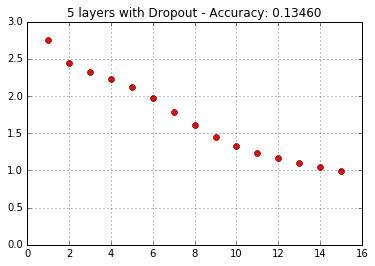

In [10]:
for epoch in range(num_epochs):
    avg_cost_DO = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c_DO = sess.run(cost_DO, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.7})
        sess.run(optimizer_DO, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.7})
        avg_cost_DO += c_DO / total_batch

    print('Epoch: {:2d} cost = {:.5f} - Dropout'.format(epoch+1, avg_cost_DO))
    plt.plot(epoch+1, avg_cost_DO, 'ro')
    
acc = sess.run(accuracy_DO, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1})
print('Accuracy:', acc)
plt.gca().set_ylim([0, 3])
plt.grid()
plt.title("5 layers with Dropout - Accuracy: {:.5f}".format(acc))
plt.show()

In [11]:
sess.close()